In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import csv

In [28]:
df=pd.read_csv("https://raw.githubusercontent.com/KeithGalli/matplotlib_tutorial/master/fifa_data.csv")
df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [31]:
df2=df[df["Position"]=='GK']
df2.sort_values(by="Overall")
df2.reset_index(inplace=True)
df2.head()

,index,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
1,9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
2,18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
3,19,19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
4,22,22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M


In [35]:
cdf=df2[['Overall','Jumping','GKDiving','GKPositioning']]
cdf.head(5)


,Overall,Jumping,GKDiving,GKPositioning
0,91,67.0,90.0,88.0
1,90,76.0,86.0,88.0
2,89,79.0,87.0,85.0
3,89,68.0,85.0,86.0
4,89,77.0,90.0,87.0


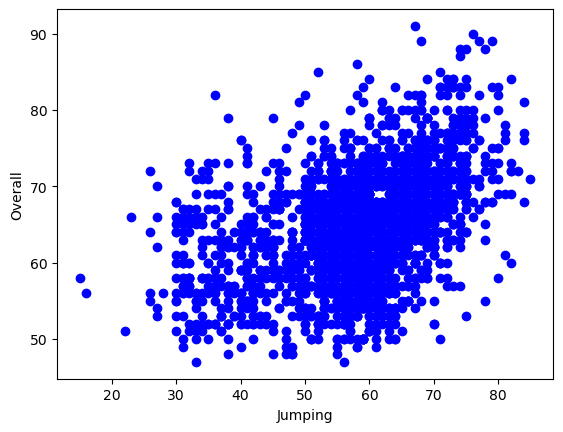

In [43]:
plt.scatter(cdf.Jumping,cdf.Overall, color='blue')
plt.xlabel("Jumping")
plt.ylabel("Overall")
plt.show()

In [49]:
msk=np.random.rand(len(df2))<0.8
train=cdf[msk]
test=cdf[~msk]

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Jumping']])
train_y = np.asanyarray(train[['Overall']])

test_x = np.asanyarray(test[['Jumping']])
test_y = np.asanyarray(test[['Overall']])

print(train_x[:3])
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

[[67.]
 [76.]
 [79.]]


array([[1.000e+00, 6.700e+01, 4.489e+03],
       [1.000e+00, 7.600e+01, 5.776e+03],
       [1.000e+00, 7.900e+01, 6.241e+03],
       ...,
       [1.000e+00, 5.500e+01, 3.025e+03],
       [1.000e+00, 3.300e+01, 1.089e+03],
       [1.000e+00, 5.600e+01, 3.136e+03]])

In [61]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.51733115  0.00731654]]
Intercept:  [69.11295336]


Text(0, 0.5, 'Overall')

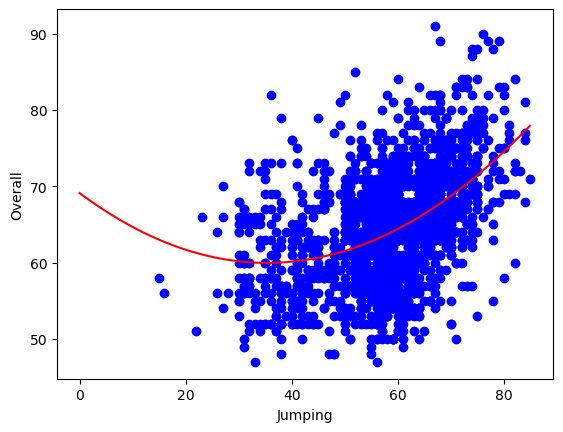

In [68]:
plt.scatter(train.Jumping, train.Overall,  color='blue')
XX = np.arange(0.0, 85.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Jumping")
plt.ylabel("Overall")

In [74]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 5.45
Residual sum of squares (MSE): 47.20
R2-score: 0.20


### slightly better prediction than linear regression with R2-score=0.19